Fitting 5 folds for each of 972 candidates, totalling 4860 fits
Mejores parámetros encontrados:
{'bootstrap': False, 'criterion': 'gini', 'max_depth': 50, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 100}
Mejor score encontrado: 0.964512494345507

Precisión del modelo: 94.40%
Exactitud del modelo: 94.07%
Recall del modelo: 93.55%
F1-score del modelo: 93.89%



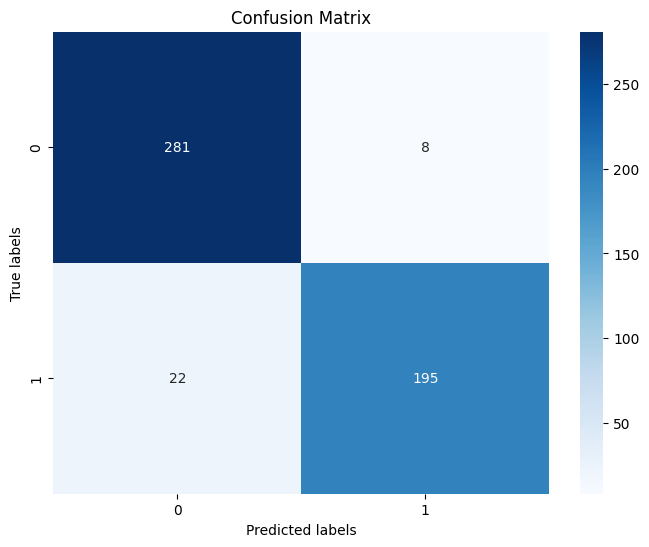

In [1]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix
import os
# Obtener la ruta del directorio actual
ruta_actual = os.getcwd()
# Concatenar el nombre del archivo al final de la ruta actual
archivo = os.path.join(ruta_actual, 'Balanced_Data_Set.xlsx')
# Cargar datos
df = pd.read_excel(archivo)

# División de datos en características (X) y etiquetas (y)
X = df.drop('CONDUCTA', axis=1)
y = df['CONDUCTA']
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir los hiperparámetros para la optimización
param_grid = {
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [0.25, 'sqrt', 'log2'],  # Sin comillas alrededor de los valores numéricos
    'bootstrap': [True, False],  # Sin comillas alrededor de True y False
    'n_estimators': [20, 50, 100],
    'max_depth': [5, 20, 50],
    'criterion': ['gini', 'entropy']
}

# Inicializar el RandomForest
rf = RandomForestClassifier(random_state=42)

# Configurar la búsqueda de hiperparámetros
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='precision', verbose=2, n_jobs=-1)

# Entrenar el modelo
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros y el mejor score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Mejores parámetros encontrados:")
print(best_params)
print("Mejor score encontrado:", best_score)

# Realizar predicciones con el mejor modelo
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calcular métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Mostrar métricas
print(f'\nPrecisión del modelo: {precision * 100:.2f}%')
print(f'Exactitud del modelo: {accuracy * 100:.2f}%')
print(f'Recall del modelo: {recall * 100:.2f}%')
print(f'F1-score del modelo: {f1 * 100:.2f}%\n')

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
